In [2]:
# -*- coding: utf-8 -*-
"""
Created on Tue Mar 17 16:48:11 2015

@author: ruifpmaia
"""

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import os

%matplotlib inline

In [2]:
epi_ds = pd.read_csv('Analysis_Graphics\\epicurious_ds', sep='\t', names=['rating', 'userid', 'itemid'])
food_ds = pd.read_csv('Analysis_Graphics\\foodcom_ds', sep='\t', names=['rating', 'userid', 'itemid'])
#koch_ds = pd.read_csv('Analysis_Graphics\\kochbar_ds8', sep='\t', usecols=[0,1,2], names=['rating', 'userid', 'itemid', 'ingredients'])
koch_ds = pd.read_csv('Analysis_Graphics\\pre_kochbar_ds', sep='\t', names=['rating', 'userid', 'itemid'])

###User Rating (log) Distribution

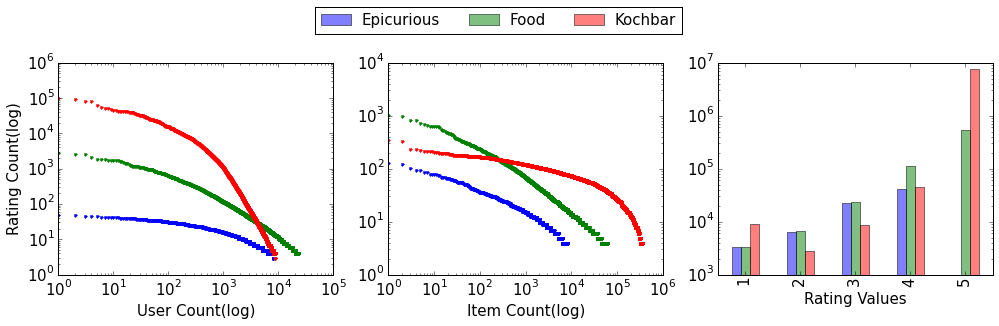

In [29]:
figure = plt.figure(figsize=(14,4))
ax1 = figure.add_subplot(1, 3, 1)
ax2 = figure.add_subplot(1, 3, 2)
ax3 = figure.add_subplot(1, 3, 3)

######################### Figure 1
epi_user=epi_ds.groupby(['userid']).count().drop('itemid', axis=1).sort('rating',  ascending=False)
epi_user.columns=['Epicurious']
ax1=epi_user.plot(loglog=True, legend=False, style='.', fontsize=15, ax=ax1)
food_user=food_ds.groupby(['userid']).count().drop('itemid', axis=1).sort('rating',  ascending=False)
food_user.columns=['Food']
ax1=food_user.plot(loglog=True, legend=False, style='.', fontsize=15, ax=ax1)
koch_user=koch_ds.groupby(['userid']).count().drop('itemid', axis=1).sort('rating',  ascending=False)
koch_user.columns=['Kochbar']
ax1.legend=False
graph1=koch_user.plot(loglog=True, legend=False, style='.', fontsize=15, ax=ax1)
graph1.set_xscale('log')
graph1.set_xlabel('User Count(log)', fontsize=15)  
graph1.set_ylabel('Rating Count(log)', fontsize=15)  
graph1.set_xlim(0,10e4)

######################## Figure 2
epi_item=epi_ds.groupby(['itemid']).count().drop('userid', axis=1).sort('rating',  ascending=False)
epi_item.columns=['Epicurious']
ax2=epi_item.plot(loglog=True, legend=False, style='.', fontsize=15, ax=ax2)
food_item=food_ds.groupby(['itemid']).count().drop('userid', axis=1).sort('rating',  ascending=False)
food_item.columns=['Food']
ax2=food_item.plot(loglog=True, legend=False, style='.', fontsize=15, ax=ax2)
koch_item=koch_ds.groupby(['itemid']).count().drop('userid', axis=1).sort('rating',  ascending=False)
koch_item.columns=['Kochbar']
graph2=koch_item.plot(loglog=True, legend=False, style='.', fontsize=15, ax=ax2)
graph2.set_xscale('log')
graph2.set_xlabel('Item Count(log)', fontsize=15)  
graph2.set_xlim(0,10e5)

##################### Figure 3
epi_rat_ds=epi_ds.groupby(['rating']).count().drop('userid', axis=1).sort()
epi_rat_ds.columns=['Epicurious']
epi_rat_ds.head()

food_rat_ds=food_ds.groupby(['rating']).count().drop('userid', axis=1).sort()
food_rat_ds.columns=['Food']

koch_rat_ds=koch_ds.groupby(['rating']).count().drop('userid', axis=1).sort()
koch_rat_ds.columns=['Kochbar']

final_dt=pd.concat([epi_rat_ds,food_rat_ds,koch_rat_ds],axis=1)

graph3=final_dt.plot(kind='bar', alpha=0.5, legend=True, style='.', ax=ax3, fontsize=15)
graph3.legend(loc='upper center', ncol=3, bbox_to_anchor=(-0.8,1.3),  fontsize=15)
graph3.set_xlabel("Rating Values", fontsize=15)  
graph3.set_yscale('log')

plt.tight_layout()


### Ingredients. Cuisine Types and Diet Categories Distributions

In [1]:
figure2 = plt.figure(figsize=(14,4))
fx1 = figure2.add_subplot(1, 3, 1)
fx2 = figure2.add_subplot(1, 3, 2)
fx3 = figure2.add_subplot(1, 3, 3)

################################################
epi_ing = pd.read_csv('Analysis_Graphics\\epicurious\\ingredients.txt', usecols=[1], sep='\t').sort('RecipeCount', ascending=False)
epi_ing.columns=["Epicurious"]
food_ing = pd.read_csv('Analysis_Graphics\\food\\foodcom_ingredients.txt', usecols=[1], sep='\t').sort('RecipeCount', ascending=False)
food_ing.columns=["Food"]
koch_ing = pd.read_csv('Analysis_Graphics\\kochbar\\kochbar_ingredients.txt', usecols=[1], sep='\t').sort('RecipeCount', ascending=False)
koch_ing.columns=["Kochbar"]

inggraph=epi_ing.plot(loglog=True, alpha=0.5, legend=False, use_index=False, fontsize=15, ax=fx1)  
inggraph=food_ing.plot(loglog=True, alpha=0.5, legend=False, use_index=False, ax=inggraph)  
inggraph=koch_ing.plot(loglog=True, alpha=0.5, legend=False, use_index=False, ax=inggraph)  
inggraph.set_xlim(0,10e5)
inggraph.set_xlabel('Ingredients Count(log)', fontsize=15)  
inggraph.set_ylabel('Recipe Count(log)', fontsize=15)  
#################################################
epi_cui = pd.read_csv('Analysis_Graphics\\epicurious\\cuisines.txt', usecols=[1], sep='\t').sort('RecipeCount', ascending=False)
epi_cui.columns=["Epicurious"]
food_cui = pd.read_csv('Analysis_Graphics\\food\\foodcom_cuisines.txt', usecols=[1], sep='\t').sort('RecipeCount', ascending=False)
food_cui.columns=["Food"]
koch_cui = pd.read_csv('Analysis_Graphics\\kochbar\\kochbar_cuisines.txt', usecols=[1], sep='\t').sort('RecipeCount', ascending=False)
koch_cui.columns=["Kochbar"]


cuigraph=epi_cui.plot(loglog=True, alpha=0.5, legend=False, use_index=False, fontsize=15, ax=fx2)  
cuigraph=food_cui.plot(loglog=True, alpha=0.5, use_index=False, legend=False, ax=cuigraph)  
cuigraph=koch_cui.plot(loglog=True, alpha=0.5, use_index=False,  legend=False, ax=cuigraph)  
cuigraph.set_xlim(0,10e2)
cuigraph.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3), ncol=3, fontsize=15)
cuigraph.set_xlabel('Cuisine Types Count(log)', fontsize=15)  

##################################################
epi_diet = pd.read_csv('Analysis_Graphics\\epicurious\\diets.txt', usecols=[1], sep='\t').sort('RecipeCount', ascending=False)
epi_diet.columns=["Epicurious"]
food_diet = pd.read_csv('Analysis_Graphics\\food\\foodcom_diets.txt', usecols=[1], sep='\t').sort('RecipeCount', ascending=False)
food_diet.columns=["Food"]
#koch_diet = pd.read_csv('Analysis_Graphics\\kochbar_diets.txt', usecols=[1], sep='\t').sort('RecipeCount', ascending=False)
#koch_diet.columns=["Koch"]

dietgraph=epi_diet.plot(loglog=True, alpha=0.5, legend=False, use_index=False, fontsize=15, ax=fx3)  
dietgraph=food_diet.plot(loglog=True, alpha=0.5, legend=False, use_index=False, ax=dietgraph)  
#dietgraph=koch_diet.plot(loglog=True, alpha=0.5, legend=True, use_index=False, ax=dietgraph)  
dietgraph.set_xlim(0,10e1)
dietgraph.set_xlabel('Dietary Groups Count(log)', fontsize=15)  

NameError: name 'plt' is not defined

### Ingredient use log distribution

Total Ing Epicurious:352
Total Ing Food:5074
Total Ing Koch:407926


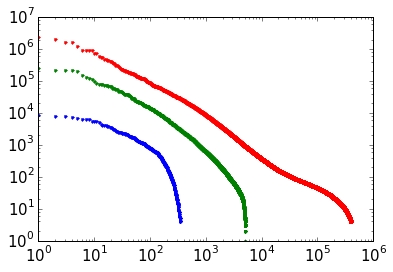

In [5]:
#epi_ds = pd.read_csv('Analysis_Graphics\\epicurious_ds8')
#food_ds = pd.read_csv('Analysis_Graphics\\foodcom_ds8')
#koch_ds = pd.read_csv('Analysis_Graphics\\kochbar_ds8', sep='\t', usecols=[2,3], names=['rating', 'userid', 'itemid', 'ingredients'])
hash_epi_ing = {}
hash_food_ing = {}
hash_koch_ing = {}

with open('Analysis_Graphics\\epicurious_ds8') as f:
    for line in f:
        ing_lst = line.split('\t')[3:]
        for ing in ing_lst:
            ing = ing.replace(':1', '').strip()
            # if 0, add id and increment unique_identifier
            hash_epi_ing[ing] = hash_epi_ing.get(ing, 0) + 1
            
epi_ing_df = pd.DataFrame.from_dict(hash_epi_ing.items())
epi_ing_df.columns=['Ing','Count']
graph=epi_ing_df.sort('Count', ascending=False).plot(use_index=False, loglog=True, legend=False, style='.', fontsize=15)

with open('Analysis_Graphics\\foodcom_ds8') as f:
    for line in f:
        ing_lst = line.split('\t')[3:]
        for ing in ing_lst:
            ing = ing.replace(':1', '').strip()
            # if 0, add id and increment unique_identifier
            hash_food_ing[ing] = hash_food_ing.get(ing, 0) + 1
            
food_ing_df = pd.DataFrame.from_dict(hash_food_ing.items())
food_ing_df.columns=['Ing','Count']
graph=food_ing_df.sort('Count', ascending=False).plot(use_index=False, loglog=True, legend=False, style='.', fontsize=15, ax=graph)
graph.set_xscale('log')
graph.set_xlim(0,10e3)


with open('Analysis_Graphics\\kochbar_ds8') as f:
    for line in f:
        ing_lst = line.split('\t')[3:]
        ing_lst = ing_lst[0].split(',')
        for ing in ing_lst:
            ing = ing.strip()
            # if 0, add id and increment unique_identifier
            hash_koch_ing[ing] = hash_koch_ing.get(ing, 0) + 1

koch_ing_df = pd.DataFrame.from_dict(hash_koch_ing.items())
koch_ing_df.columns=['Ing','Count']
graph=koch_ing_df.sort('Count', ascending=False).plot(use_index=False, loglog=True, legend=False, style='.', fontsize=15, ax=graph)
graph.set_xscale('log')
graph.set_xlim(0,10e5)

print 'Total Ing Epicurious:%d' % epi_ing_df.shape[0]
print 'Total Ing Food:%d' % food_ing_df.shape[0]
print 'Total Ing Koch:%d' % koch_ing_df.shape[0]



### Cuisine Type use log distribution

Total Cuisine Types Epicurious:21
Total Cuisine Types Food:29


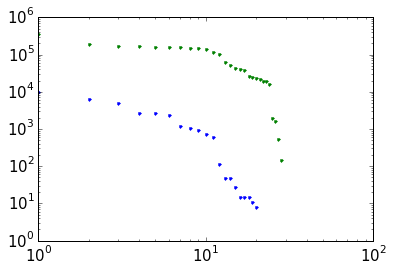

In [13]:
hash_epi_ct = {}
hash_food_ct = {}
hash_koch_ct = {}

with open('Analysis_Graphics\\epicurious_ds14') as f:
    for line in f:
        ct_lst = line.split('\t')[3:]
        for ct in ct_lst:
            ct = ct.replace(':1', '').strip()
            # if 0, add id and increment unique_identifier
            hash_epi_ct[ct] = hash_epi_ct.get(ct, 0) + 1
            
epi_ct_df = pd.DataFrame.from_dict(hash_epi_ct.items())
epi_ct_df.columns=['Ct','Count']
graph=epi_ct_df.sort('Count', ascending=False).plot(loglog=True, use_index=False,  legend=False, style='.', fontsize=15)

with open('Analysis_Graphics\\foodcom_ds14') as f:
    for line in f:
        ct_lst = line.split('\t')[3:]
        for ct in ct_lst:
            ct = ct.replace(':1', '').strip()
            # if 0, add id and increment unique_identifier
            hash_food_ct[ct] = hash_food_ct.get(ct, 0) + 1
            
food_ct_df = pd.DataFrame.from_dict(hash_food_ct.items())
food_ct_df.columns=['Ct','Count']
graph=food_ct_df.sort('Count', ascending=False).plot(loglog=True, use_index=False,  legend=False, style='.', fontsize=15, ax=graph)
#graph.set_xscale('log')

'''
with open('Analysis_Graphics\\kochbar_ds8') as f:
    for line in f:
        ing_lst = line.split('\t')[3:]
        ing_lst = ing_lst[0].split(',')
        for ing in ing_lst:
            ing = ing.strip()
            # if 0, add id and increment unique_identifier
            hash_koch_ing[ing] = hash_koch_ing.get(ing, 0) + 1

koch_ing_df = pd.DataFrame.from_dict(hash_koch_ing.items())
koch_ing_df.columns=['Ing','Count']
graph=koch_ing_df.sort('Count', ascending=False).plot(use_index=False, loglog=True, legend=False, style='.', fontsize=15, ax=graph)
graph.set_xscale('log')
'''
graph.set_xlim(0,10e1)


print 'Total Cuisine Types Epicurious:%d' % epi_ct_df.shape[0]
print 'Total Cuisine Types Food:%d' % food_ct_df.shape[0]
#print 'Total Ing Koch:%d' % koch_ing_df.shape[0]

